<a href="https://colab.research.google.com/github/Mario-RJunior/calculadora-imoveis/blob/master/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados

Daremos início ao nosso estudo importando e posteriormente explorando os dados para compreendê-los melhor. A seguir faremos um tratamento destes dados e posteriormente iremos exportá-los para que possamos enfim utilizá-los para gerar um modelo de Machine Learning cujo objetivo é prever o valor do aluguel de imóveis localizados na cidade de São Paulo.

## 1) Importando os dados

In [ ]:
# Importanto as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Recuperando o link da base de dados gerada no estudo de web scraping
LINK = 'https://raw.githubusercontent.com/Mario-RJunior/web-scraping-ML/master/dados_imoveis.csv'

In [ ]:
# Gerando o dataframe
df = pd.read_csv(LINK)
df.head()

,zona,quartos,area,preco
0,norte,2.0,60.0,1700
1,norte,2.0,70.0,850
2,norte,1.0,160.0,700
3,norte,1.0,70.0,600
4,norte,1.0,40.0,720


In [ ]:
# Verificando dados estatísticos
df.describe()

,quartos,area,preco
count,1153.000000,1277.000000,1.344000e+03
mean,2.355594,172.808927,6.260988e+03
std,1.142688,186.747532,4.769564e+04
min,1.000000,1.000000,3.000000e+02
25%,1.000000,60.000000,1.100000e+03
50%,2.000000,120.000000,2.300000e+03
75%,3.000000,230.000000,5.500000e+03
max,11.000000,3748.000000,1.600000e+06


In [ ]:
# Verificando valores nulos
df.isna().sum()

zona         0
quartos    191
area        67
preco        0
dtype: int64

In [ ]:
# Verificando os tipos das variáveis
df.dtypes

zona        object
quartos    float64
area       float64
preco        int64
dtype: object

In [ ]:
# Verificando a correlação
df.corr()

,quartos,area,preco
quartos,1.000000,0.500339,0.065398
area,0.500339,1.000000,0.088775
preco,0.065398,0.088775,1.000000


## 2) Análise Exploratória dos Dados e Preprocessamento

Podemos agora fazer alguns gráficos para entendermos os dados. Para isso, iremos separar a base de dados entre base de treino e de teste e por fim cumprir as etapas de preprocessamentos em cada uma separadamente.

In [ ]:
# Divisão da base entre treino e teste
treino, teste = train_test_split(df, 
                                 stratify=df['zona'], 
                                 test_size=0.25, 
                                 random_state=0)

In [ ]:
print(f'Base de treino {treino.shape} \nBase de teste: {teste.shape}')

Base de treino (1008, 4) 
Base de teste: (336, 4)


- Base de treino

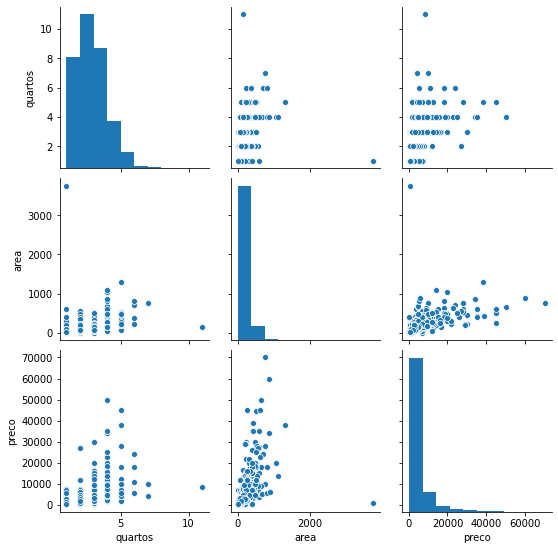

In [ ]:
# Distplot com os dados originais
sns.pairplot(data=treino)
plt.show()

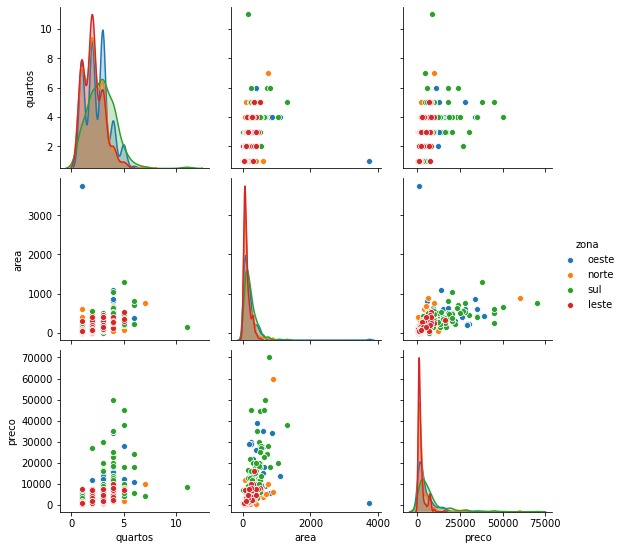

In [ ]:
# Distplot com os dados originais
sns.pairplot(data=treino, hue='zona')
plt.show()

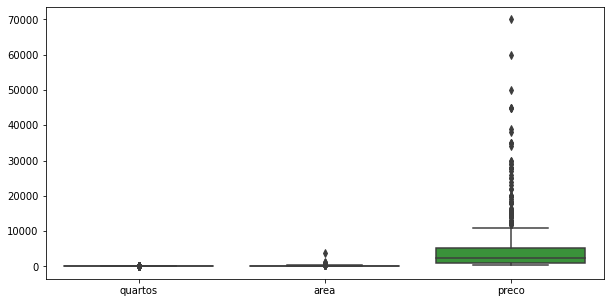

In [ ]:
# Boxplot com os dados originais de treino
fig = plt.figure(figsize=(10,5))
sns.boxplot(data=treino)
plt.show()

### 2.1) Preprocessamento para base de treino

- Valores missing

In [ ]:
# Criando um dataframe intermediário para para tratamento dos valores NaN
colunas = ['quartos', 'area', 'preco']
treino_num = treino[colunas]

In [ ]:
# Preenchendo valores NaN com a mediana
treino_medianas = treino_num.median()
treino_num = treino_num.fillna(treino_medianas)

In [ ]:
# Verificando valores nulos para base de treino
treino_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 1204 to 358
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quartos  1008 non-null   float64
 1   area     1008 non-null   float64
 2   preco    1008 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 31.5 KB


In [ ]:
# Transformando dados em escala logarítmica
treino_num = treino_num.apply(np.log1p)

In [ ]:
treino_num.head()

,quartos,area,preco
1204,0.693147,3.044522,6.908755
184,0.693147,3.713572,7.601402
1039,1.609438,5.707110,9.615205
343,1.098612,4.110874,7.496097
1210,1.098612,5.493061,8.412055


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


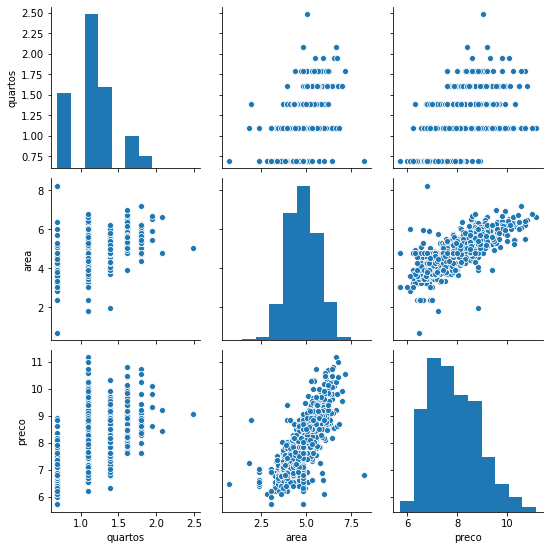

In [ ]:
# Novo pairplot para base de treinos sem valores missing
treino[colunas] = treino_num
sns.pairplot(data=treino)
plt.show()

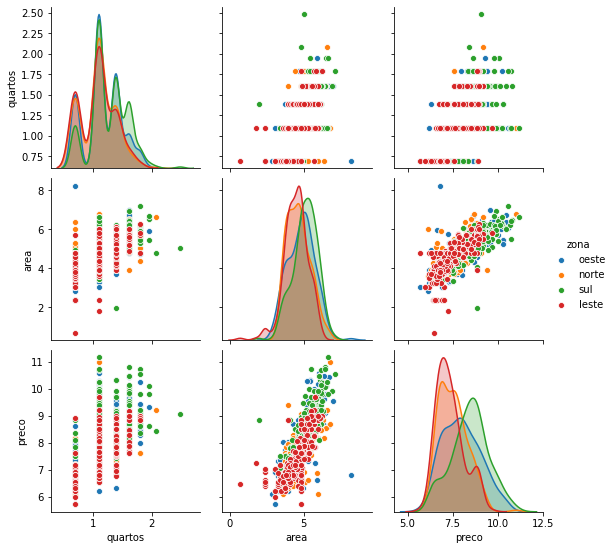

In [ ]:
sns.pairplot(data=treino, hue='zona')
plt.show()

- Análise de outliers

Podemos agora remover os outliers do nosso dataframe. Neste caso iremos testar os modelos de machine learning a seguir para as duas situações: com os outliers e sem outliers e assim faremos uma comparação entre as duas situações.

In [ ]:
# Análise de outliers

REMOVER_OUTLIERS = False

quartis = treino_num.quantile([0.25,0.5,0.75])

Q1 = quartis.loc[0.25]
Q3 = quartis.loc[0.75]
IQR = Q3-Q1

k = 1.5 
limite_inferior = Q1-k*IQR
limite_superior = Q1+k*IQR

treino_num_sem_outlier = treino_num[treino_num>=limite_inferior].dropna()
treino_num_sem_outlier = treino_num_sem_outlier[treino_num_sem_outlier<=limite_superior].dropna()

if REMOVER_OUTLIERS:
  treino = treino.loc[treino_num_sem_outlier.index]

treino_num_sem_outlier

,quartos,area,preco
1204,0.693147,3.044522,6.908755
184,0.693147,3.713572,7.601402
343,1.098612,4.110874,7.496097
1210,1.098612,5.493061,8.412055
375,1.386294,5.993961,9.210440
...,...,...,...
284,1.098612,4.510860,6.908755
107,0.693147,4.454347,7.208600
18,1.098612,5.303305,7.937732
685,1.098612,4.394449,7.650169


Repetindo o pairplot para os dados em escala logarítmica.

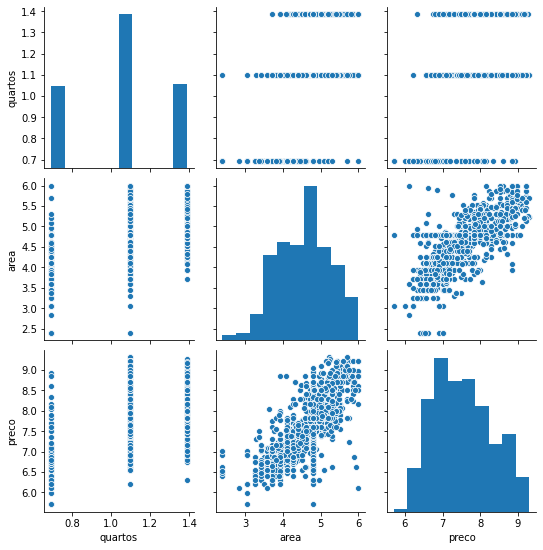

In [ ]:
sns.pairplot(data=treino_num_sem_outlier)
plt.show()

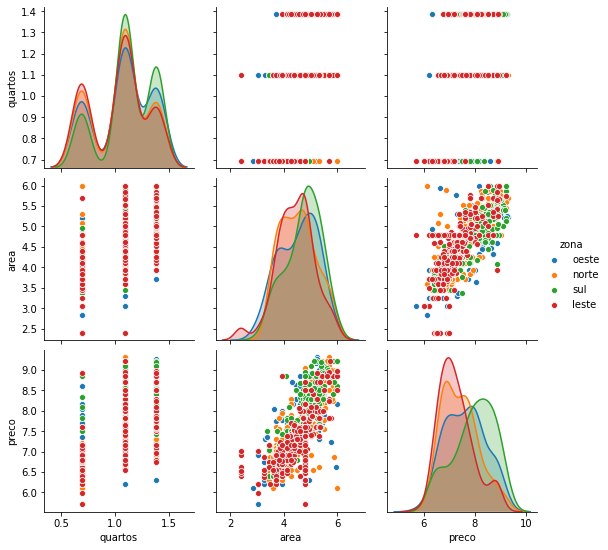

In [ ]:
sns.pairplot(treino.loc[treino_num_sem_outlier.index], hue='zona')
plt.show()

- Tratamento de colunas categóricas

Agora devemos dar uma atenção especial à coluna categórica "zona". Uma vez que nosso dataframe será submetido à algorítmos de machine learning que utilizam cálculos matemáticos para busca de padrões, não podemos deixar colunas com dados no formato object (ou seja, do tipo string).Essas variáveis são chamadas ***dummy*** e o processo de conversão nestas variáveis é chamado ***One-Hot Encoding***.

In [ ]:
# Criando variáveis dummy
treino = pd.get_dummies(treino)
treino.head()

,quartos,area,preco,zona_leste,zona_norte,zona_oeste,zona_sul
1204,0.693147,3.044522,6.908755,0,0,1,0
184,0.693147,3.713572,7.601402,0,1,0,0
1039,1.609438,5.707110,9.615205,0,0,1,0
343,1.098612,4.110874,7.496097,0,0,0,1
1210,1.098612,5.493061,8.412055,0,0,1,0


### 2.2) Preprocessamento para base de teste

- Valores missing

In [ ]:
teste.isnull().sum()

zona        0
quartos    51
area       20
preco       0
dtype: int64

In [ ]:
teste = teste.fillna(treino_medianas)
teste.head()

,zona,quartos,area,preco
546,sul,3.0,86.0,1500
423,sul,3.0,390.0,40000
1336,oeste,4.0,490.0,11000
961,leste,1.0,120.0,1430
1148,oeste,1.0,52.0,5100


- Transformação para escala logarítmica

In [ ]:
teste[colunas] = teste[colunas].apply(np.log1p)
teste.head()

,zona,quartos,area,preco
546,sul,1.386294,4.465908,7.313887
423,sul,1.386294,5.968708,10.596660
1336,oeste,1.609438,6.196444,9.305741
961,leste,0.693147,4.795791,7.266129
1148,oeste,0.693147,3.970292,8.537192


- Variáveis categóricas

In [ ]:
teste = pd.get_dummies(teste)
teste.head()

,quartos,area,preco,zona_leste,zona_norte,zona_oeste,zona_sul
546,1.386294,4.465908,7.313887,0,0,0,1
423,1.386294,5.968708,10.596660,0,0,0,1
1336,1.609438,6.196444,9.305741,0,0,1,0
961,0.693147,4.795791,7.266129,1,0,0,0
1148,0.693147,3.970292,8.537192,0,0,1,0


### 2.5) Exportar treino e teste preprocessado

In [ ]:
treino.to_csv('treino_preprocessado.csv', index=False)

In [ ]:
teste.to_csv('teste_preprocessado.csv', index=False)